In [2]:
import sys
assert sys.version_info > (3,5)
# to mention that we need python 3.5 or above
import sklearn
assert sklearn.__version__ >= "0.20"
# to mention that we need version 0.2 and above for5 sklearn
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [7]:
#loading dataset mushroom.csv into a variable
dataset = pd.read_csv('mushroom.csv')
#printing the head ~ first 5 entries 
print(dataset.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [8]:
#info about the data types of the dataset
print(dataset.info())
#the output suggests that there are no null values this function is use full for checking the data types and if there are
#any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
#countes the number of instances in each class
#number of edible examples is 4208
#number of poisonous examples is 3916
# to do cut eqaulise
classes = dataset['class'].value_counts()
print("number of classes ",classes)

number of classes  e    4208
p    3916
Name: class, dtype: int64


In [12]:
print(dataset.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [34]:
# replacing the "e" that represents "edible" mushrooms with 1
# replacing the "p" that represents "poisonous" mushrooms with 0
dataset["class"].replace(['e','p'], [0,1], inplace=True)
# replacing in the following order bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
dataset['cap-shape'].replace(['b','c','x','f','k','s'], [0,1,2,3,4,5], inplace=True)
# replacing in the following order fibrous=f,grooves=g,scaly=y,smooth=s
dataset['cap-surface'].replace(['f','g','y','s'],[0,1,2,3], inplace=True)
#replcaing in the following order brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
dataset['cap-color'].replace(['n','b','c','g','r','p','u','e','w','y'],[0,1,2,3,4,5,6,7,8,9], inplace=True)
#replacing in the following order bruises=t,no=f
dataset['bruises'].replace(['t','f'],[0,1],inplace=True)
#replace in the following order almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
dataset['odor'].replace(['a','l','c','y','f','m','n','p','s'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following attached=a, descending=d, free=f, notched=n
dataset['gill-attachment'].replace(['a','d','f','n'],[0,1,2,3], inplace=True)
#replace in order of the following close=c,crowded=w,distant=d
dataset['gill-spacing'].replace(['c','w','d'],[0,1,2],inplace=True)
#replcace in order of the following broad=b,narrow=n
dataset['gill-size'].replace(['b','n'],[0,1],inplace=True)
#replace in order of the following black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
dataset['gill-color'].replace(['k','n','b','h','g','r','o','p','u','e','w','y'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
#replace in order of the following stalk-shape: enlarging=e,tapering=t
dataset['stalk-shape'].replace(['e','t'],[0,1],inplace=True)
#replace in order of the following stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
dataset['stalk-root'].replace(['b','c','u','e','z','r','?'],[0,1,2,3,4,5,6],inplace=True)
#replace in order of the following stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
dataset['stalk-surface-above-ring'].replace(['f','y','k','s'],[0,1,2,3],inplace=True)
#replcae in order of the following stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
dataset['stalk-surface-below-ring'].replace(['f','y','k','s'],[0,1,2,3],inplace=True)
#replace in order of the following stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
dataset['stalk-color-above-ring'].replace(['n','b','c','g','o','p','e','w','y'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
dataset['stalk-color-below-ring'].replace(['n','b','c','g','o','p','e','w','y'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following veil-type: partial=p,universal=u
dataset['veil-type'].replace(['p','u'],[0,1],inplace=True)
#replcae in order of the following veil-color: brown=n,orange=o,white=w,yellow=y
dataset['veil-color'].replace(['n','o','w','y'],[0,1,2,3],inplace=True)
#replace in order of the following ring-number: none=n,one=o,two=t
dataset['ring-number'].replace(['n','o','t'],[0,1,2],inplace=True)
#replace in order of the following ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
dataset['ring-type'].replace(['c','e','f','l','n','p','s','z'],[0,1,2,3,4,5,6,7],inplace=True)
#replace in order of the following spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
dataset['spore-print-color'].replace(['k','n','b','h','r','o','u','w','y'],[0,1,2,3,4,5,6,7,8],inplace=True)
#replace in order of the following population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
dataset['population'].replace(['a','c','n','s','v','y'],[0,1,2,3,4,5],inplace=True)
#replace in the order of the following habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
dataset['habitat'].replace(['g','l','m','p','u','w','d'],[0,1,2,3,4,5,6],inplace=True)

In [35]:
# checking if the values have changed 
classes = dataset['class'].value_counts()
print("number of classes ",classes)
print(dataset.info())

number of classes  0    4208
1    3916
Name: class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  81

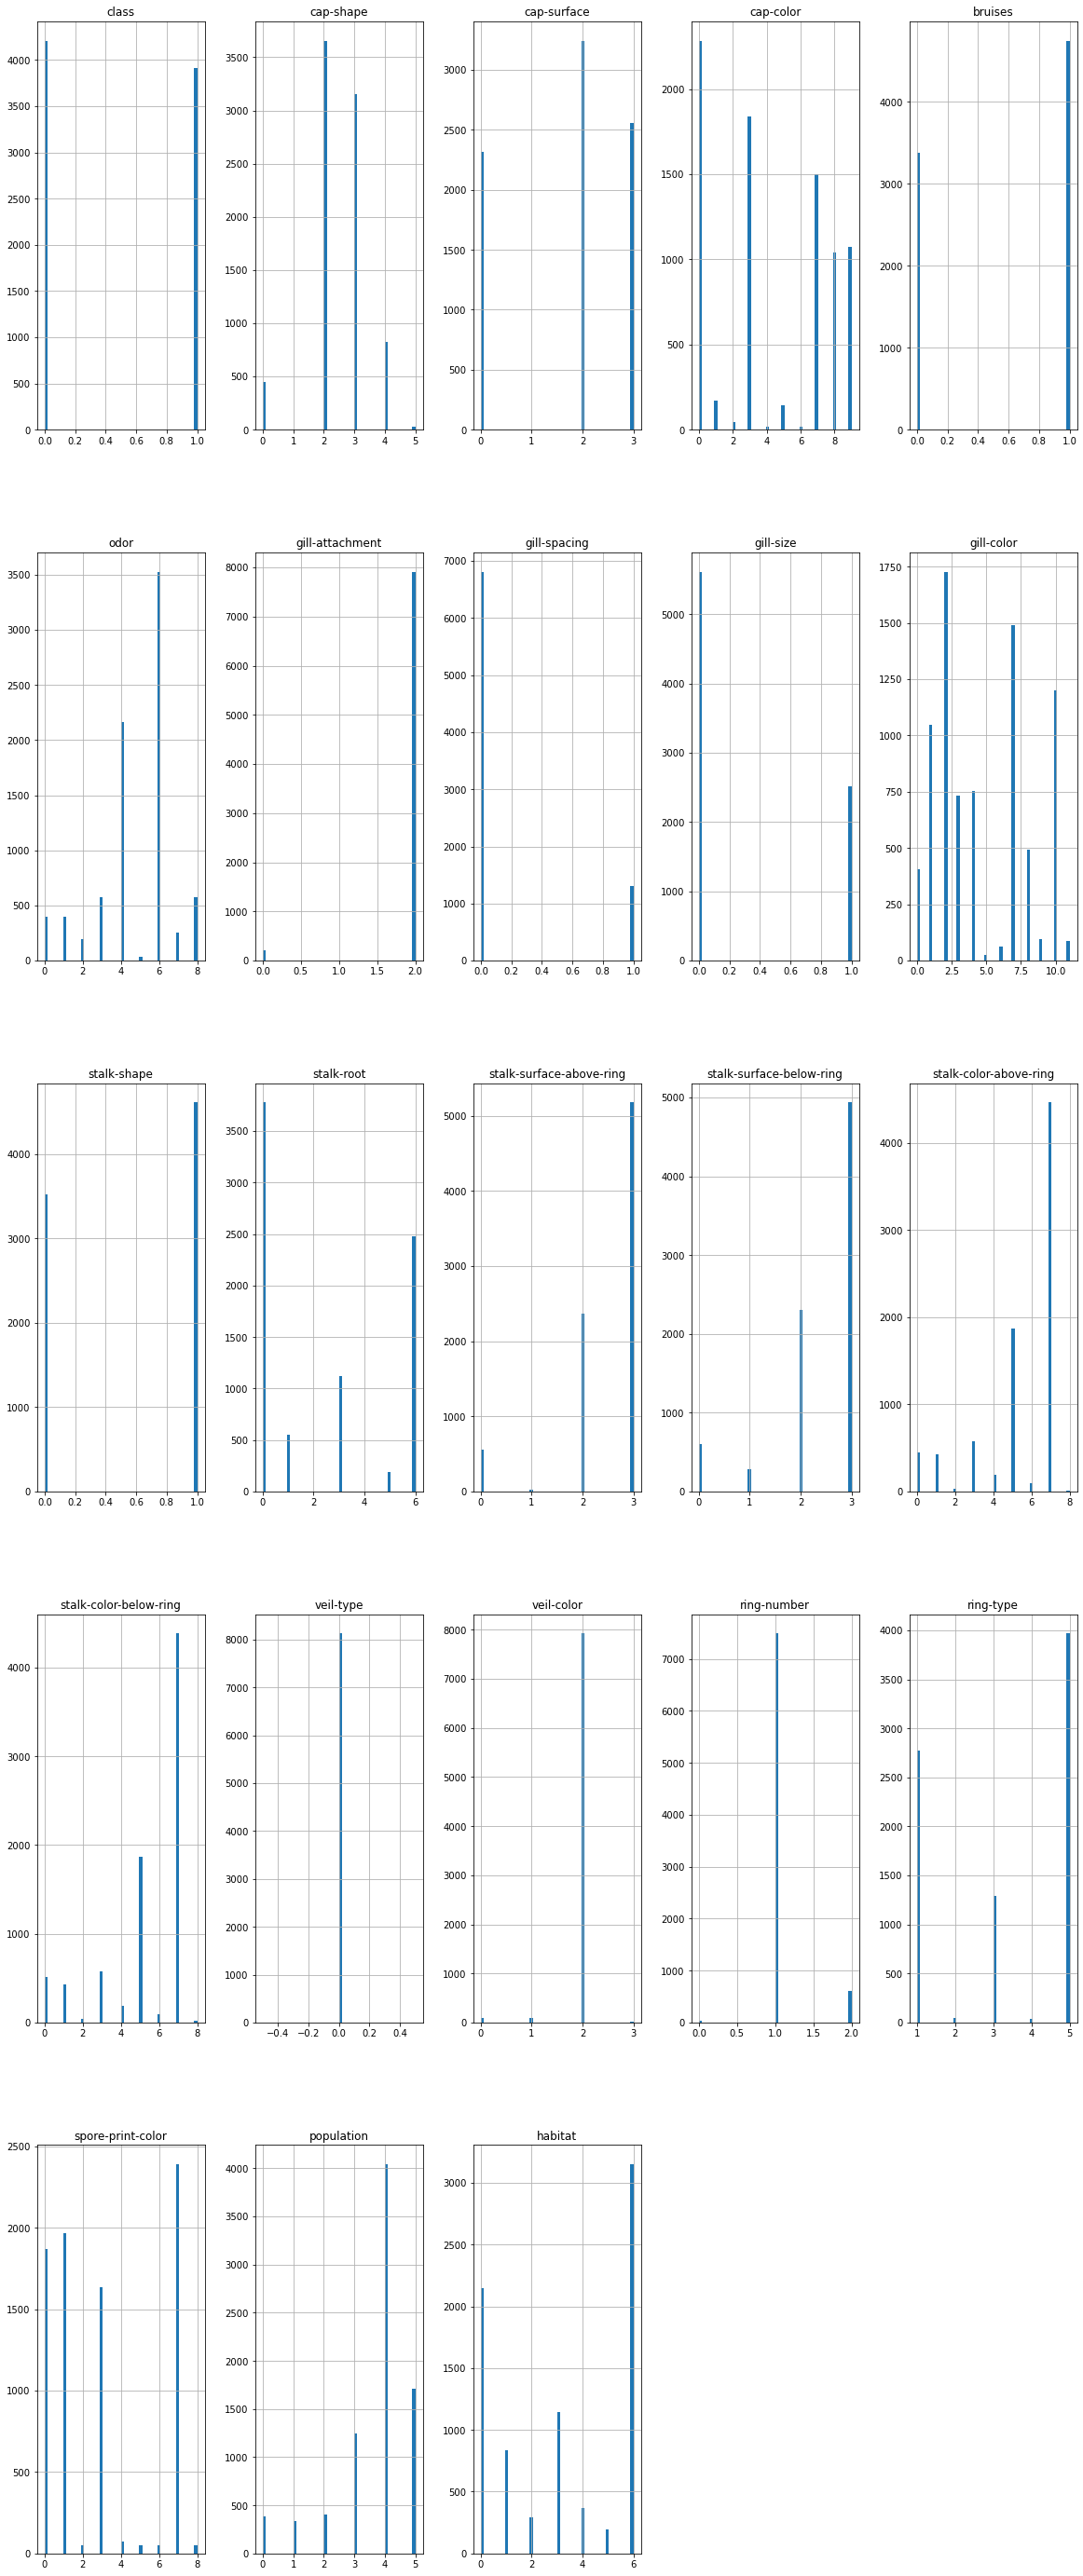

In [43]:
dataset.hist(bins=50, figsize=(20,50))
plt.show()

<AxesSubplot:xlabel='population', ylabel='habitat'>

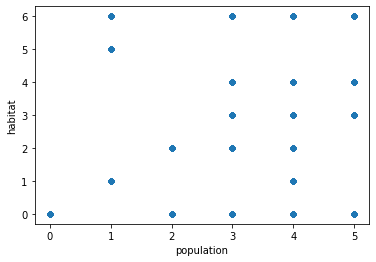

In [49]:
#visualising the classes edible and poisonous in with respect to the habitats they are found in 
dataset.plot(kind="scatter",x="population",y="habitat")